In [330]:
import tensorflow as tf
import os 

In [331]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [332]:
tf.config.list_physical_devices('GPU')

[]

In [333]:
import cv2
import imghdr

In [334]:
data_dir = 'data'

In [335]:
image_exts = ['jpeg','jpg','bmg','png']

In [336]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image) 
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(e))
            print('Issue with image {}'.format(image_path))
            

In [337]:
import numpy as np
from matplotlib import pyplot as plt

In [338]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 233 files belonging to 2 classes.


In [339]:
data_iterator = data.as_numpy_iterator()

In [340]:
#classhappy:0
#classsad:1
batch = data_iterator.next()

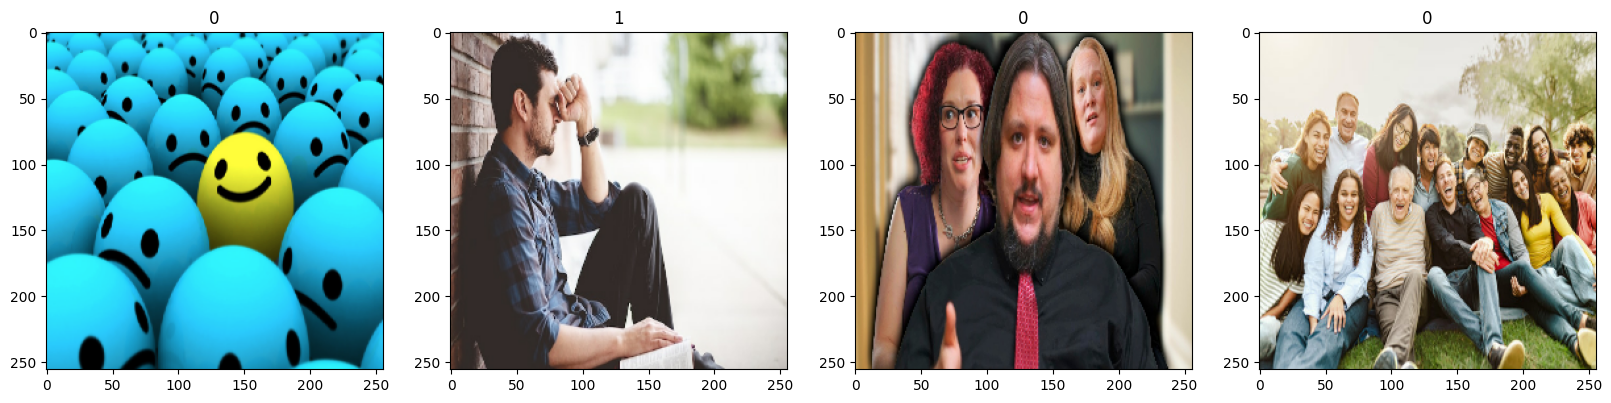

In [341]:
fig,ax = plt.subplots(ncols=4 ,figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [342]:
data = data.map(lambda x,y: (x/255, y))

In [343]:
data.as_numpy_iterator().next()

(array([[[[0.1882353 , 0.11372549, 0.08627451],
          [0.1882353 , 0.11372549, 0.08627451],
          [0.1882353 , 0.11372549, 0.08627451],
          ...,
          [0.16207108, 0.21697304, 0.25226715],
          [0.17823224, 0.23841912, 0.27547488],
          [0.18359375, 0.2502604 , 0.2894761 ]],
 
         [[0.1882353 , 0.11372549, 0.08627451],
          [0.1882353 , 0.11372549, 0.08627451],
          [0.1882353 , 0.11372549, 0.08627451],
          ...,
          [0.15943627, 0.21433823, 0.24963236],
          [0.17559743, 0.2357843 , 0.27284008],
          [0.17880787, 0.24547455, 0.28469023]],
 
         [[0.1882353 , 0.11372549, 0.08627451],
          [0.1882353 , 0.11372549, 0.08627451],
          [0.1882353 , 0.11372549, 0.08627451],
          ...,
          [0.15637255, 0.2112745 , 0.24656862],
          [0.17173545, 0.23192234, 0.2689781 ],
          [0.17436738, 0.24103406, 0.28024974]],
 
         ...,
 
         [[0.12084865, 0.08163296, 0.07378983],
          [0.11764

In [344]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [345]:
train_size

5

In [346]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [347]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [348]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [349]:
model = Sequential()

In [350]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [351]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [352]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [353]:
logdir = 'logs'

In [354]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [355]:
hist = model.fit(train,epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5929 - loss: 1.6277 - val_accuracy: 0.4531 - val_loss: 0.7682
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 678ms/step - accuracy: 0.5861 - loss: 0.6707 - val_accuracy: 0.6562 - val_loss: 0.5343
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 710ms/step - accuracy: 0.5990 - loss: 0.6533 - val_accuracy: 0.8438 - val_loss: 0.5736
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 694ms/step - accuracy: 0.7993 - loss: 0.5696 - val_accuracy: 0.8438 - val_loss: 0.4644
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 810ms/step - accuracy: 0.7934 - loss: 0.5382 - val_accuracy: 0.9062 - val_loss: 0.4411
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 713ms/step - accuracy: 0.8955 - loss: 0.3802 - val_accuracy: 0.8594 - val_loss: 0.3603
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 690ms/step - accuracy: 0.9308 - loss: 0.2547 - val_accuracy: 0.9062 - val_loss: 0.2511
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 721ms/step - accuracy: 0.9121 - loss: 0.2364 - val_accuracy: 0.9844 - val_loss: 0

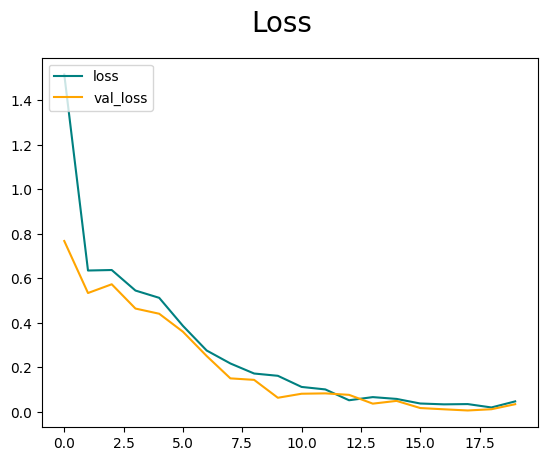

In [356]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()


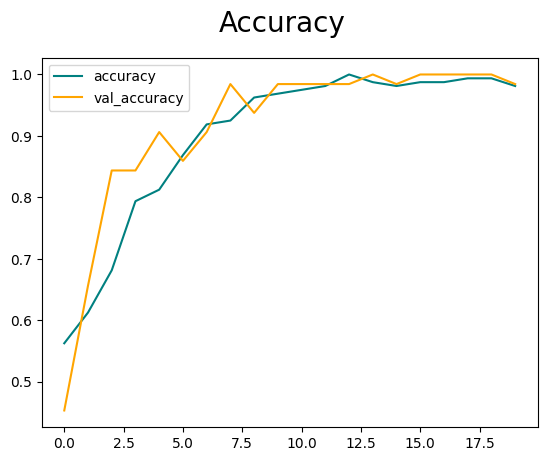

In [357]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [358]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [359]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [360]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [361]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:1.0, Recall:1.0, Accuracy:1.0


In [362]:
import cv2

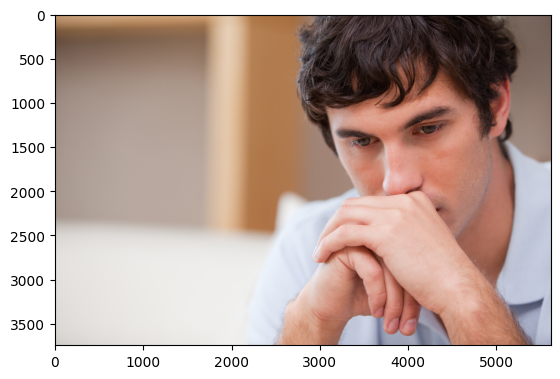

In [363]:
img = cv2.imread('testsad.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

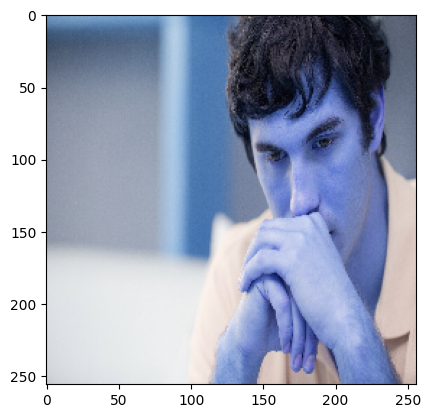

In [364]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [365]:
resize.shape

TensorShape([256, 256, 3])

In [366]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [367]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


In [368]:
yhat

array([[0.95846015]], dtype=float32)

In [369]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [370]:
from tensorflow.keras.models import load_model

In [371]:
model.save(os.path.join('models','happysadmodel.h5'))

In [372]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [373]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [374]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
